## --- Day 3: Crossed Wires ---
The gravity assist was successful, and you're well on your way to the Venus refuelling station. During the rush back on Earth, the fuel management system wasn't completely installed, so that's next on the priority list.

Opening the front panel reveals a jumble of wires. Specifically, two wires are connected to a central port and extend outward on a grid. You trace the path each wire takes as it leaves the central port, one wire per line of text (your puzzle input).

The wires twist and turn, but the two wires occasionally cross paths. To fix the circuit, you need to find the intersection point closest to the central port. Because the wires are on a grid, use the Manhattan distance for this measurement. While the wires do technically cross right at the central port where they both start, this point does not count, nor does a wire count as crossing with itself.

For example, if the first wire's path is R8,U5,L5,D3, then starting from the central port (o), it goes right 8, up 5, left 5, and finally down 3:

...........
...........
...........
....+----+.
....|....|.
....|....|.
....|....|.
.........|.
.o-------+.
...........

Then, if the second wire's path is U7,R6,D4,L4, it goes up 7, right 6, down 4, and left 4:

...........
.+-----+...
.|.....|...
.|..+--X-+.
.|..|..|.|.
.|.-X--+.|.
.|..|....|.
.|.......|.
.o-------+.
...........
These wires cross at two locations (marked X), but the lower-left one is closer to the central port: its distance is 3 + 3 = 6.

Here are a few more examples:

R75,D30,R83,U83,L12,D49,R71,U7,L72
U62,R66,U55,R34,D71,R55,D58,R83 = distance 159
R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = distance 135
What is the Manhattan distance from the central port to the closest intersection?

In [7]:
from shapely.geometry import LineString, MultiLineString

In [5]:
# load our input data:
# import our data:
fname = 'day_3_input.txt'
f = open(fname, 'r')
wire_grid = f.read().splitlines()
f.close()
# wire_grid = list(map(str, wire_grid[0].split(',')))
print(wire_grid)
path_1 = list(map(str, wire_grid[0].split(',')))
path_2 = list(map(str, wire_grid[1].split(',')))

['R1000,U564,L752,D449,R783,D938,L106,U130,R452,U462,R861,U654,L532,D485,R761,U336,L648,U671,L618,U429,R122,D183,L395,U662,R900,U644,L168,D778,L268,U896,L691,D852,L987,U462,R346,U103,R688,U926,R374,D543,R688,D682,R992,D140,L379,D245,L423,D504,R957,U937,L67,D560,L962,U275,R688,D617,L778,U581,R672,D402,R3,U251,R593,U897,L866,U189,L8,D5,R761,U546,R594,D880,L318,U410,L325,U564,L889,U688,L472,D146,R317,D314,L229,U259,R449,D630,L431,U4,R328,D727,R298,D558,R81,D508,L160,U113,L994,U263,L193,D631,R881,D608,L924,U447,R231,U885,L157,D739,R656,D121,R704,U437,L710,D207,R150,U406,R816,U683,R496,D715,L899,U757,L579,D684,L85,D354,R198,D411,R818,U772,L910,U493,R38,D130,L955,U741,R744,D224,L485,U201,L903,D904,R748,U288,R34,U673,R503,D931,L190,U547,L83,D341,R459,U114,L758,U220,L506,U444,L472,D941,L68,D910,R415,U668,L957,U709,R817,U116,R699,D424,R548,D285,R347,U396,R791,U62,L785,D360,L628,U415,L568,D429,R154,D840,L865,U181,L106,D564,L452,U156,L967,D421,R41,U500,L316,D747,R585,D858,L809,U402,L484,U752,R319

In [43]:
# len(path_2)
len(path_1)

301

In [28]:
# path_1

In [145]:
path_1[0][0]

'R'

In [155]:
int(path_1[0][1:])

1000

In [70]:
# Create two lines
line_a = LineString([(0, 0), (1, 1), (1,2), (1,4)])
line_b = LineString([(1, 1), (0, 2), (0,3), (2,3)])

In [71]:
line_a.intersects(line_b)

True

In [72]:
line_a.touches(line_b)

False

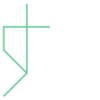

In [73]:
multi_line = MultiLineString([line_a, line_b])
multi_line

In [95]:
line_a.intersection(line_b)
print(line_a.intersection(line_b))

MULTIPOINT (1 1, 1 3)


In [96]:
line1 = LineString([(0,0), (1,0), (1,1)])
line2 = LineString([(0,1), (1,1)])

print(line1.intersection(line2))

POINT (1 1)


In [8]:
# line 1 instructions: R8,U5,L5,D3
# line 2 instructions: U7,R6,D4,L4

# Create two lines
ex_line_1 = LineString([(0, 0), (8, 0), (8,5), (3,5), (3,2)])
ex_line_2 = LineString([(0, 0), (0, 7), (6,7), (6,3), (2,3)])

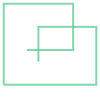

In [9]:
MultiLineString([ex_line_1, ex_line_2])

In [10]:
print(ex_line_1.intersection(ex_line_2))
print(ex_line_1.intersection(ex_line_2))

MULTIPOINT (0 0, 3 3, 6 5)
MULTIPOINT (0 0, 3 3, 6 5)


In [108]:
x_coord_1 = ex_line_1.intersection(ex_line_2)[1].x
x_coord_2 = ex_line_1.intersection(ex_line_2)[0].x

y_coord_1 = ex_line_1.intersection(ex_line_2)[1].y
y_coord_2 = ex_line_1.intersection(ex_line_2)[0].y

(x_coord_1-x_coord_2)+(y_coord_1-y_coord_2)

6.0

In [ ]:
coordinates = []
def points_to_coords(points):
    coordinates.append([])

In [27]:
# we need a function to go from instructions to coordinates:


# line 1 instructions: R8,U5,L5,D3
# line 2 instructions: U7,R6,D4,L4

instruction_example = ['R8','U5','L5','D3']
instruction_example2 = ['U7','R6','D4','L4']

# Create two lines
ex_line_1 = LineString([(0, 0), (8, 0), (8,5), (3,5), (3,2)])
ex_line_2 = LineString([(0, 0), (0, 7), (6,7), (6,3), (2,3)])

origin = (0,0)
blah = [origin]
blah.append(origin)

In [4]:
origin = (0,0)
def instruction_to_coords(instructions, start_position):
    coord_dict = []
    coord_dict.append(origin)
    for i in instructions:
        if i[0] == 'R':
            new_x = start_position[0] + int(i[1:])
            new_y = start_position[1]
        elif i[0] == 'L':
            new_x = start_position[0] - int(i[1:])
            new_y = start_position[1]
        elif i[0] == 'U':
            new_y = start_position[1] + int(i[1:])
            new_x = start_position[0]
        elif i[0] == 'D':
            new_y = start_position[1] - int(i[1:])
            new_x = start_position[0]
        coords = (new_x,new_y)
        coord_dict.append(coords)
        start_position = coords
        
    return coord_dict

In [163]:
origin

(0, 0)

In [159]:
instruction_example

['R8', 'U5', 'L5', 'D3']

In [165]:
instruction_to_coords(instruction_example,origin)

[(0, 0), (8, 0), (8, 5), (3, 5), (3, 2)]

In [167]:
instruction_to_coords(instruction_example2,origin)

[(0, 0), (0, 7), (6, 7), (6, 3), (2, 3)]

In [28]:
print(LineString(instruction_to_coords(instruction_example,origin)).intersection(LineString(instruction_to_coords(instruction_example2,origin))))

MULTIPOINT (0 0, 3 3, 6 5)


In [97]:
# Here are a few more examples:

l1 = ['R75','D30','R83','U83','L12','D49','R71','U7','L72']
l2 = ['U62','R66','U55','R34','D71','R55','D58','R83'] # = distance 159
l3 = ['R98','U47','R26','D63','R33','U87','L62','D20','R33','U53','R51']
l4 = ['U98','R91','D20','R16','D67','R40','U7','R15','U6','R7'] # = distance 135

In [98]:
line1 = instruction_to_coords(l1,origin)
line2 = instruction_to_coords(l2,origin)
line3 = instruction_to_coords(l3,origin)
line4 = instruction_to_coords(l4,origin)

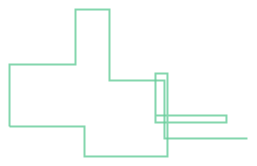

In [172]:
MultiLineString([line1, line2])

In [177]:
print(LineString(line1).intersection(LineString(line2)))

MULTIPOINT (0 0, 146 46, 155 4, 155 11, 158 -12)


In [183]:
print(LineString(line3).intersection(LineString(line4)))

MULTIPOINT (0 0, 107 47, 107 51, 107 71, 124 11, 157 18)


In [201]:
for i in LineString(line1).intersection(LineString(line2)):
    print(i.x+i.y)

0.0
192.0
159.0
166.0
146.0


In [3]:
# note: this manhattan distance calculation is defaulting to distance to the origin, not a given point
def get_min_manhattan(line_intersections):
    output = []
    for i in line_intersections:
        result = abs(i.x)+abs(i.y)
        if result > 0:
            output.append(result)
    return min(output)

In [14]:
get_min_manhattan(LineString(line1).intersection(LineString(line2)))

159.0

In [15]:
get_min_manhattan(LineString(line3).intersection(LineString(line4)))

135.0

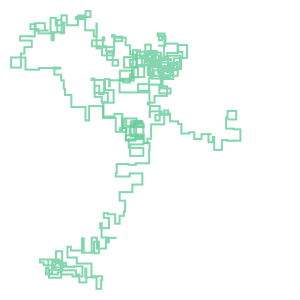

In [16]:
# ok, we're good to go:

wire1 = instruction_to_coords(path_1,origin)
wire2 = instruction_to_coords(path_2,origin)
MultiLineString([wire1, wire2])

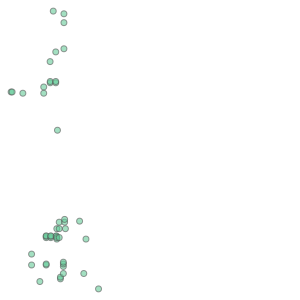

In [17]:
LineString(wire1).intersection(LineString(wire2))

In [18]:
intersections = LineString(wire1).intersection(LineString(wire2))
get_min_manhattan(intersections)

1064.0

## --- Part Two ---
It turns out that this circuit is very timing-sensitive; you actually need to minimize the signal delay.

To do this, calculate the number of steps each wire takes to reach each intersection; choose the intersection where the sum of both wires' steps is lowest. If a wire visits a position on the grid multiple times, use the steps value from the first time it visits that position when calculating the total value of a specific intersection.

The number of steps a wire takes is the total number of grid squares the wire has entered to get to that location, including the intersection being considered. Again consider the example from above:

...........
.+-----+...
.|.....|...
.|..+--X-+.
.|..|..|.|.
.|.-X--+.|.
.|..|....|.
.|.......|.
.o-------+.
...........
In the above example, the intersection closest to the central port is reached after 8+5+5+2 = 20 steps by the first wire and 7+6+4+3 = 20 steps by the second wire for a total of 20+20 = 40 steps.

However, the top-right intersection is better: the first wire takes only 8+5+2 = 15 and the second wire takes only 7+6+2 = 15, a total of 15+15 = 30 steps.

Here are the best steps for the extra examples from above:

R75,D30,R83,U83,L12,D49,R71,U7,L72
U62,R66,U55,R34,D71,R55,D58,R83 = 610 steps
R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = 410 steps
What is the fewest combined steps the wires must take to reach an intersection?

In [26]:
print(intersections)

MULTIPOINT (-1003 828, -981 828, -749 801, -560 -2917, -560 -2681, -381 -3275, -297 801, -297 936, -244 -2917, -244 -2895, -244 -2325, -244 -2296, -244 -2286, -159 1485, -157 1027, -157 1055, -144 -2325, -144 -2296, -144 -2286, -91 2578, -37 1027, -37 1055, -37 1695, -26 -2296, -26 -2286, -14 -2356, -14 -2323, -14 -2131, 0 0, 38 -2323, 38 -2131, 38 -1990, 64 -3217, 64 -3180, 128 -3101, 128 -2948, 128 -2895, 128 -2856, 140 1763, 140 2328, 140 2520, 155 -1990, 155 -1930, 172 -2131, 479 -1968, 570 -3101, 617 -2356, 889 -3434)


In [23]:
LineString(wire1).length

153282.0

In [24]:
LineString(wire2).length

149566.0

In [54]:
instruction_example = ['R8','U5','L5','D3']
instruction_example2 = ['U7','R6','D4','L4']

# Create two lines
# ex_line_1 = LineString([(0, 0), (8, 0), (8,5), (3,5), (3,2)])
# ex_line_2 = LineString([(0, 0), (0, 7), (6,7), (6,3), (2,3)])
ex_line_1 = instruction_to_coords(instruction_example, origin)
ex_line_2 = instruction_to_coords(instruction_example2, origin)
example_intersections = LineString(ex_line_1).intersection(LineString(ex_line_2))
print(example_intersections)

MULTIPOINT (0 0, 3 3, 6 5)


In [43]:
first_intersect = (example_intersections[1].x,example_intersections[1].y)
first_intersect

(3.0, 3.0)

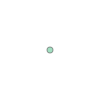

In [74]:
example_intersections[0]

In [75]:
LineString(ex_line_1).project(example_intersections[1])

20.0

In [51]:
LineString(ex_line_2).project(example_intersections[1])

20.0

In [52]:
LineString(ex_line_1).project(example_intersections[2])

15.0

In [53]:
LineString(ex_line_2).project(example_intersections[2])

15.0

In [88]:
intersections = LineString(line1).intersection(LineString(line2))
len(intersections)
for i in range(len(intersections)):
    print(i)

0
1
2
3
4


In [95]:
def get_min_circuit_length(line1, line2):
    intersections = LineString(line1).intersection(LineString(line2))
    output = []
    for i in range(len(intersections)):
        line_1_result = LineString(line1).project(intersections[i])
        line_2_result = LineString(line2).project(intersections[i])
        result = line_1_result + line_2_result
        if result > 0:
            output.append(result)
    return min(output)

In [96]:
get_min_circuit_length(ex_line_1,ex_line_2)

30.0

In [99]:
# additional examples: first should be 610, second 410
get_min_circuit_length(line1,line2)

610.0

In [100]:
get_min_circuit_length(line3,line4)

410.0

In [102]:
# let's calculate minimum circuit length for the test input:
get_min_circuit_length(wire1,wire2)

25676.0